**The objective of the dimension reduction phase is to reduce the number of features in the dataset while preserving relevant information. In this step, I use of both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) on a highly correlated dataset. The results of these techniques are then merged with the target values for subsequent modeling.**

1. Linear Discriminant Analysis (LDA):
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique that aims to find the linear combinations of features that best separate different classes in the dataset. It maximizes the distance between class means while minimizing the spread within each class.
LDA was applied to the dataset to project it onto a lower-dimensional space while maximizing the separation between different classes defined by the target variable.

2. Principal Component Analysis (PCA):
Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique that focuses on capturing the variance in the data. It identifies the principal components, which are linear combinations of the original features, sorted by the amount of variance they explain.
PCA was applied to the highly correlated dataset to identify the principal components that capture the most significant variance in the data.

3. Merging with Target Values:
The results obtained from both LDA and PCA were merged with the target values to create a unified dataset for subsequent modeling.
Merging the dimensionality-reduced features with the target values enables the construction of a dataset suitable for supervised learning tasks, allowing for the development of predictive models.

## 1- import and reading data (with outlier and without it)

In [2]:
import sys

sys.path.append('../../../scripts/utilities')
from helper_functions import *

sys.path.append('../../../scripts/data_preprocessing')
from data_reduction import *

__with outliers__

In [3]:
base_path = '../../../data/processed_data/'
df1 = read_files('df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated.csv',
                 base_path=base_path)[0]

## 2- extract X and y from normalized dataset

In [3]:
target_features = ['MCQ160L', 'MCQ220']
y_1 = df1[target_features[0]]
y_2 = df1[target_features[1]]
y = df1[target_features]
X = df1.drop(columns=target_features)

## 3- perform PCA

__find optimal num components of PCA base first target__

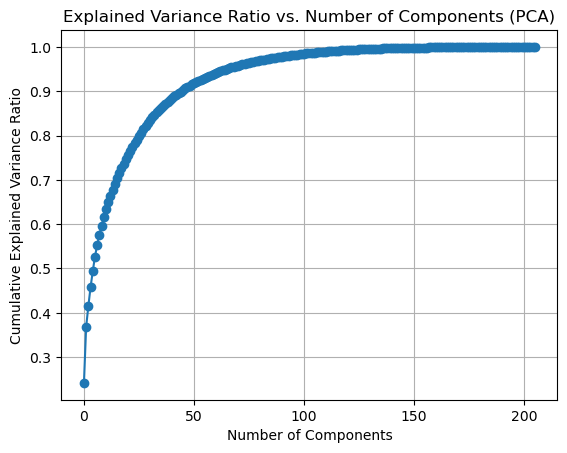

Optimal Number of Components (PCA): 66
Explained Variance Ratio: [0.24178342 0.12651797 0.04672094 0.04270525 0.03566907 0.03324214
 0.02585148 0.02342009 0.02080509 0.01892331 0.01811191 0.01552837
 0.0145745  0.01427063 0.01274349 0.01258094 0.01158807 0.01109942
 0.01036237 0.01008392 0.00931306 0.00906676 0.00882171 0.00853496
 0.00828955 0.0080825  0.00804356 0.00767625 0.00718541 0.00704235
 0.00672885 0.0060128  0.00574133 0.0054903  0.00527855 0.00500726
 0.0048164  0.00444597 0.00426615 0.0041032  0.00404066 0.00387407
 0.003681   0.00365979 0.00360379 0.00346752 0.00338471 0.0032321
 0.00301838 0.0029674  0.00282446 0.00267693 0.00257575 0.00249796
 0.00240789 0.00235473 0.00231279 0.00220204 0.00212926 0.00203671
 0.00200335 0.00189556 0.00189061 0.00180896 0.00169951 0.00168387]


In [4]:
pca_optimal_num_components1, explained_variance_ratio1 = find_optimal_num_components(X,y_1, method='PCA')

__find optimal num components of PCA base second target__

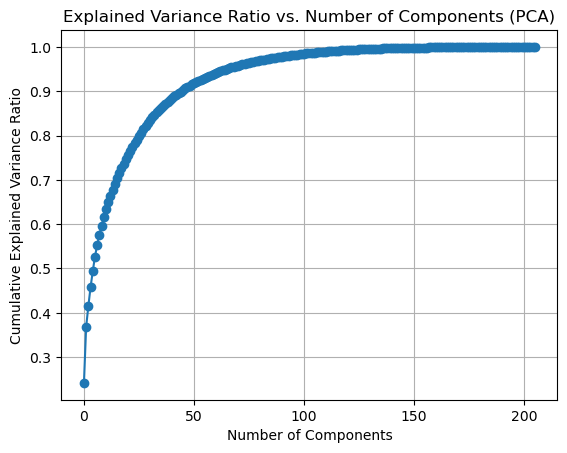

Optimal Number of Components (PCA): 66
Explained Variance Ratio: [0.24178342 0.12651797 0.04672094 0.04270525 0.03566907 0.03324214
 0.02585148 0.02342009 0.02080509 0.01892331 0.01811191 0.01552837
 0.0145745  0.01427063 0.01274349 0.01258094 0.01158807 0.01109942
 0.01036237 0.01008392 0.00931306 0.00906676 0.00882171 0.00853496
 0.00828955 0.0080825  0.00804356 0.00767625 0.00718541 0.00704235
 0.00672885 0.0060128  0.00574133 0.0054903  0.00527855 0.00500726
 0.0048164  0.00444597 0.00426615 0.0041032  0.00404066 0.00387407
 0.003681   0.00365979 0.00360379 0.00346752 0.00338471 0.0032321
 0.00301838 0.0029674  0.00282446 0.00267693 0.00257575 0.00249796
 0.00240789 0.00235473 0.00231279 0.00220204 0.00212926 0.00203671
 0.00200335 0.00189556 0.00189061 0.00180896 0.00169951 0.00168387]


In [5]:
pca_optimal_num_components2, explained_variance_ratio2 = find_optimal_num_components(X,y_2, method='PCA')

__perform pca with optimal num components base on first target__

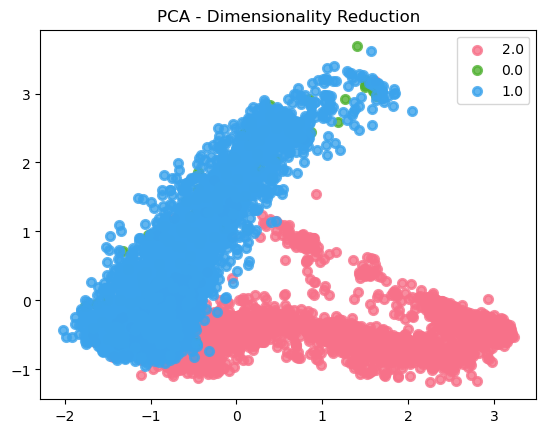

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.579869,2.607962,-0.013729,0.039563,-0.744653,0.386341,0.037244,-0.633377,0.029506,0.154682,...,0.045574,-0.181008,0.001711,-0.009126,0.074687,0.031617,0.000886,-0.018412,-0.009111,-0.095081
1,-0.207876,1.176554,-0.151006,0.044439,0.043830,-0.148279,-0.517354,1.107614,0.683597,0.335846,...,-0.059846,0.032220,0.021599,-0.033472,0.082406,0.003352,0.042244,-0.020156,-0.177898,0.347373
2,-1.160681,-0.105902,-0.726604,-0.348981,0.098982,0.323604,-0.448545,0.006619,-0.228720,-0.336924,...,0.068096,0.089137,0.138560,0.009651,-0.086717,0.139875,0.081644,-0.189422,-0.026104,-0.108815
3,1.201291,-0.378371,0.793986,-0.518685,-0.482912,0.520330,-0.479837,0.040818,0.180371,0.046692,...,-0.180352,-0.278113,0.174690,-0.351062,0.098166,0.238933,-0.147273,-0.140149,-0.272588,0.017279
4,-0.190038,1.542929,0.182044,-0.742998,0.143934,1.109309,-0.782554,0.807523,-0.556020,-0.230331,...,0.097213,0.076520,0.231530,-0.070013,-0.128604,-0.088897,-0.076382,0.356103,0.078130,-0.103568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,-0.630082,0.024536,-0.147324,-0.007330,-0.215834,-0.122883,-0.339623,-0.453858,0.829815,-0.652551,...,0.013055,0.043000,0.045345,0.123967,0.064943,-0.091194,0.111444,0.000131,0.002759,0.050021
10171,2.491810,-0.119062,-1.212582,0.367382,-0.059432,-0.050249,0.837834,0.497645,-0.093188,-0.468154,...,-0.045880,-0.025617,-0.054328,0.150977,0.125428,-0.081389,-0.069032,0.068387,-0.015626,0.014614
10172,-0.833141,0.157400,-0.086837,0.161475,1.094779,-0.534944,-0.108327,0.441728,-0.606660,0.277489,...,-0.005678,-0.061707,-0.089839,-0.180320,0.036865,-0.066494,0.032592,0.015817,0.152350,-0.060435
10173,1.879839,-0.781854,0.963547,-0.097669,0.621928,-0.089720,0.126017,-0.134402,-0.408716,0.213326,...,0.048041,-0.062266,-0.092672,-0.016644,0.036418,-0.109368,0.018156,0.126994,0.010812,-0.049874


In [6]:
plot_and_perform_dimensionality_reduction(X, y_1, target_names=df1[target_features[0]].unique(),
                              num_components=pca_optimal_num_components1, method='PCA')

__perform pca with optimal num components base on second target__

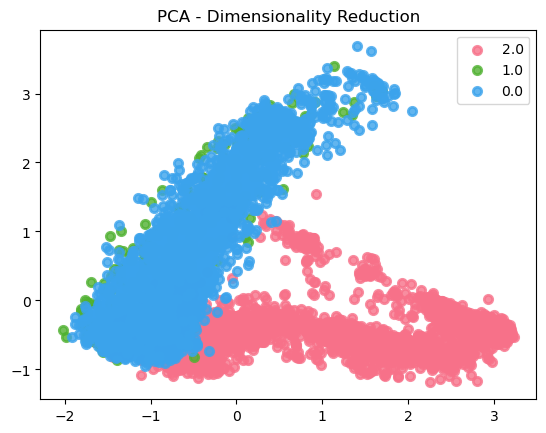

In [7]:
df_X_PCA = plot_and_perform_dimensionality_reduction(X, y_2, target_names=df1[target_features[1]].unique(),
                              num_components=pca_optimal_num_components2, method='PCA')

### save PCA dataframe

In [8]:
df_PCA = pd.concat([df_X_PCA, y], axis=1)
df_PCA.head()
save_files([df_PCA],'df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated_PCA_with_outliers.csv', base_path=base_path)

## 4- perform LDA

__find optimal num components of LDA base first target__

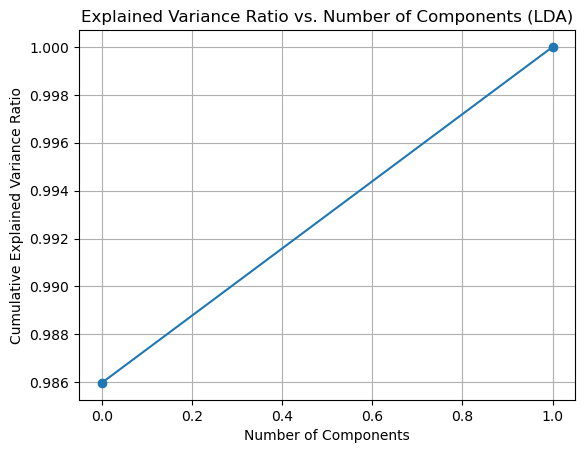

Optimal Number of Components (LDA): 1
Explained Variance Ratio: [0.98597426]


In [9]:
lda_optimal_num_components1, explained_variance_ratio1 = find_optimal_num_components(X, y_1, method='LDA')

__find optimal num components of LDA base second target__

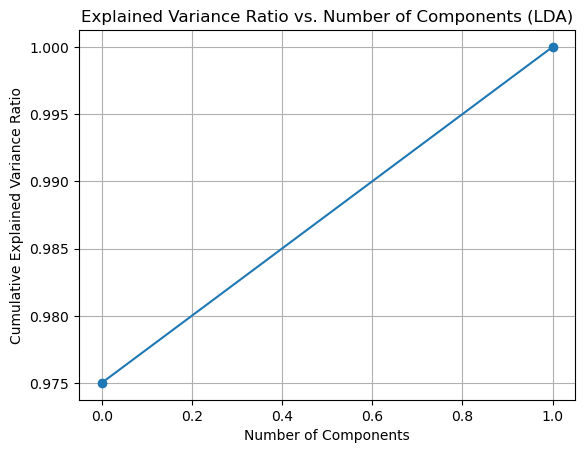

Optimal Number of Components (LDA): 1
Explained Variance Ratio: [0.97501452]


In [10]:
lda_optimal_num_components2, explained_variance_ratio2 = find_optimal_num_components(X, y_2, method='LDA')

__perform lda base on first target__

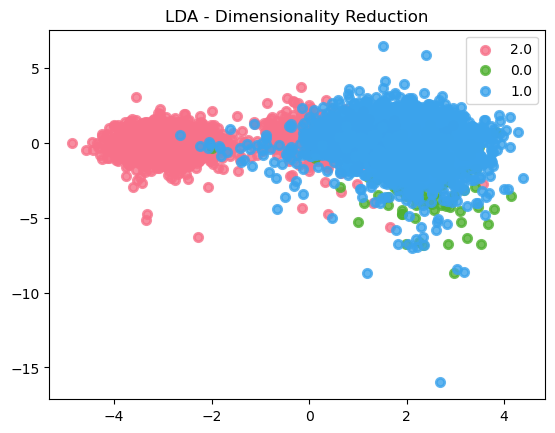

,0,1
0,2.724650,-1.135005
1,2.037506,0.397459
2,2.271466,1.417200
3,-3.035371,0.969797
4,2.670117,2.874537
...,...,...
10170,0.633846,2.018509
10171,-2.895091,-0.236360
10172,2.614786,0.988213
10173,-2.711355,-0.481074


In [11]:
plot_and_perform_dimensionality_reduction(X, y_1, target_names=df1[target_features[0]].unique(),
                              num_components=lda_optimal_num_components1, method='LDA')

__perform lda base on second target__

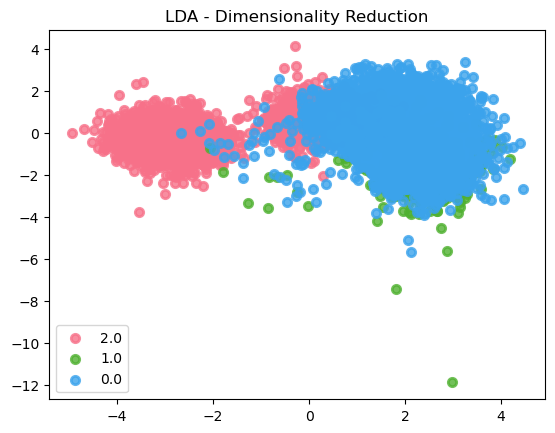

In [12]:
df_X_LDA=plot_and_perform_dimensionality_reduction(X, y_2, target_names=df1[target_features[1]].unique(),
                              num_components=lda_optimal_num_components2, method='LDA')

###  save LDA data frame

In [13]:
df_LDA = pd.concat([df_X_LDA, y], axis=1)
df_LDA.head()
save_files([df_LDA],'df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated_LDA_with_outliers.csv', base_path=base_path)

__without outlier__

## PCA

In [4]:
df3 = read_files('df_filling_missing_values_with_median_encoded_handle_noisy_handle_outlier_normalized_highly_correlated.csv',
                 base_path=base_path)[0]

In [5]:
target_features = ['MCQ160L', 'MCQ220']
y_1 = df3[target_features[0]]
y_2 = df3[target_features[1]]
y = df3[target_features]
X = df3.drop(columns=target_features)

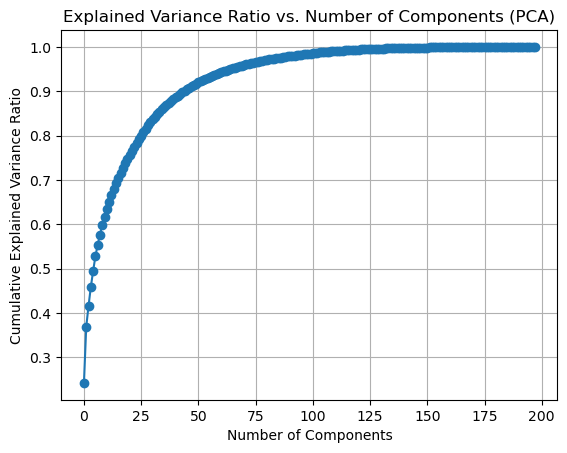

Optimal Number of Components (PCA): 65
Explained Variance Ratio: [0.24223382 0.12674295 0.04680885 0.04276831 0.03572884 0.03330027
 0.02589895 0.02346408 0.02083404 0.01896018 0.01813633 0.01555568
 0.01460239 0.01429724 0.01276482 0.01260494 0.01160956 0.01112004
 0.0103818  0.01010318 0.00933078 0.00908304 0.0088368  0.00854963
 0.0083048  0.00809797 0.00805847 0.0076897  0.00719814 0.00705363
 0.0067417  0.0060207  0.00574976 0.00550082 0.00528788 0.0050134
 0.00482539 0.00445339 0.00427357 0.00410727 0.00404789 0.00387829
 0.00368529 0.00366401 0.00360815 0.00347401 0.0033913  0.00323815
 0.00302272 0.00296979 0.0028292  0.00268132 0.00258072 0.00250214
 0.00236528 0.00235915 0.00231327 0.00220256 0.00211915 0.0020374
 0.00197427 0.00189813 0.00187936 0.00181213 0.00170179]


In [6]:
pca_optimal_num_components3, explained_variance_ratio3 = find_optimal_num_components(X,y_1, method='PCA')

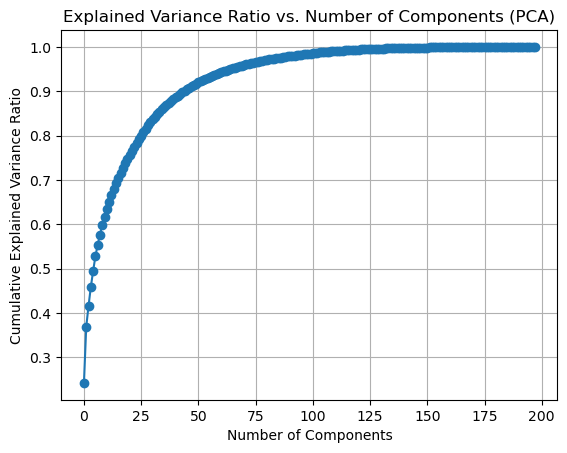

Optimal Number of Components (PCA): 65
Explained Variance Ratio: [0.24223382 0.12674295 0.04680885 0.04276831 0.03572884 0.03330027
 0.02589895 0.02346408 0.02083404 0.01896018 0.01813633 0.01555568
 0.01460239 0.01429724 0.01276482 0.01260494 0.01160956 0.01112004
 0.0103818  0.01010318 0.00933078 0.00908304 0.0088368  0.00854963
 0.0083048  0.00809797 0.00805847 0.0076897  0.00719814 0.00705363
 0.0067417  0.0060207  0.00574976 0.00550082 0.00528788 0.0050134
 0.00482539 0.00445339 0.00427357 0.00410727 0.00404789 0.00387829
 0.00368529 0.00366401 0.00360815 0.00347401 0.0033913  0.00323815
 0.00302272 0.00296979 0.0028292  0.00268132 0.00258072 0.00250214
 0.00236528 0.00235915 0.00231327 0.00220256 0.00211915 0.0020374
 0.00197427 0.00189813 0.00187936 0.00181213 0.00170179]


In [7]:
pca_optimal_num_components4, explained_variance_ratio4 = find_optimal_num_components(X,y_2, method='PCA')

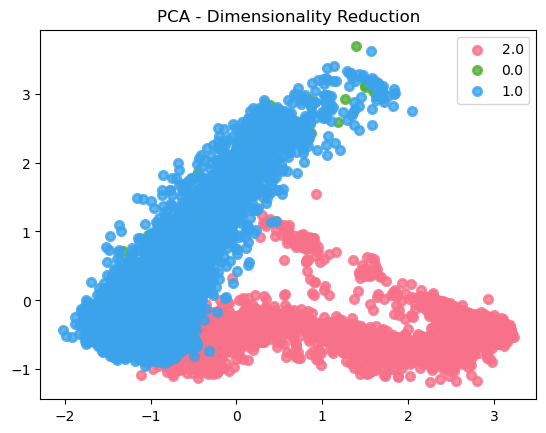

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.580027,2.607898,-0.012923,0.042211,-0.744269,0.384448,0.037636,-0.633730,0.030818,0.154588,...,-0.007268,0.085453,-0.165773,-0.009626,0.005879,0.139897,0.031994,-0.004617,-0.038935,0.013298
1,-0.207380,1.176834,-0.152118,0.042034,0.043006,-0.146723,-0.518165,1.107319,0.682188,0.335555,...,-0.112979,-0.040051,-0.000369,0.087793,0.029802,-0.001677,0.072798,-0.104587,0.053908,0.092118
2,-1.160501,-0.106630,-0.724013,-0.346314,0.099687,0.321724,-0.448973,0.005476,-0.224007,-0.337043,...,-0.079738,0.095949,0.124595,0.099904,-0.004445,-0.030284,0.153788,-0.010111,-0.146809,-0.045903
3,1.200837,-0.378030,0.795004,-0.517059,-0.484442,0.519399,-0.480149,0.040099,0.180388,0.046823,...,0.588779,-0.179541,-0.258730,0.231415,-0.323440,0.142840,0.100968,0.244827,-0.162253,-0.253192
4,-0.189982,1.543244,0.183501,-0.742725,0.141967,1.109440,-0.783746,0.806441,-0.557535,-0.229943,...,-0.069273,0.144143,0.086047,0.186919,-0.047569,-0.106475,-0.052190,-0.022946,0.335779,-0.092829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,-0.630171,0.025016,-0.148014,-0.008815,-0.216283,-0.121991,-0.339455,-0.454551,0.828290,-0.652696,...,-0.028669,0.043162,0.044642,0.039124,0.142510,0.017525,0.003486,-0.181920,0.003505,0.048872
10171,2.491405,-0.118955,-1.213471,0.364750,-0.058815,-0.050625,0.836828,0.498057,-0.092544,-0.467963,...,-0.084579,-0.073439,-0.031314,-0.030342,0.153519,0.090658,-0.121873,-0.009152,0.050069,-0.027629
10172,-0.831701,0.156452,-0.086468,0.160958,1.093720,-0.536170,-0.107663,0.442717,-0.603098,0.277365,...,-0.013247,-0.033477,-0.064259,-0.074735,-0.185103,0.068067,-0.044025,-0.093667,0.048521,0.122067
10173,1.879669,-0.781960,0.963755,-0.096430,0.621971,-0.089633,0.126165,-0.134224,-0.408084,0.213419,...,0.111871,0.052539,-0.068616,-0.090163,-0.006333,0.053701,-0.053421,-0.118677,0.138267,-0.020885


In [8]:
plot_and_perform_dimensionality_reduction(X, y_1, target_names=df3[target_features[0]].unique(),
                              num_components=pca_optimal_num_components3, method='PCA')

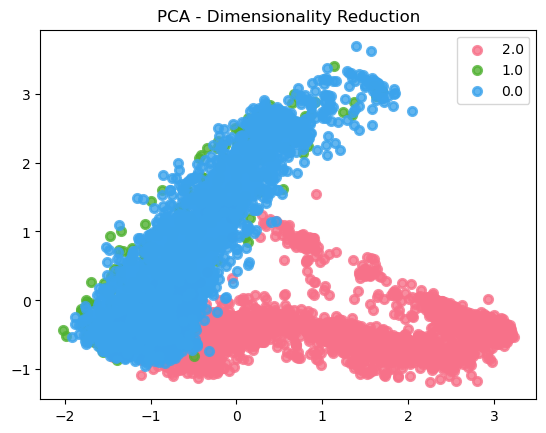

In [9]:
df_X_PCA = plot_and_perform_dimensionality_reduction(X, y_2, target_names=df3[target_features[1]].unique(),
                              num_components=pca_optimal_num_components4, method='PCA')

In [10]:
df_PCA = pd.concat([df_X_PCA, y], axis=1)
df_PCA.head()
save_files([df_PCA],'df_filling_missing_values_with_median_encoded_handle_noisy_handle_outlier_normalized_highly_correlated_perform_PCA.csv', base_path=base_path)

## LDA

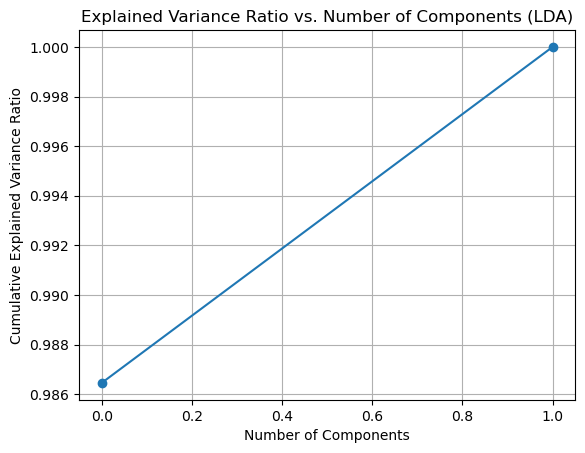

Optimal Number of Components (LDA): 1
Explained Variance Ratio: [0.98645179]


In [12]:
lda_optimal_num_components3, explained_variance_ratio6 = find_optimal_num_components(X, y_1, method='LDA')

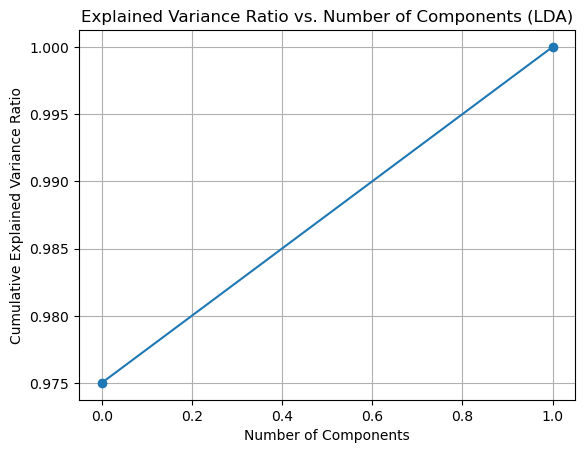

Optimal Number of Components (LDA): 1
Explained Variance Ratio: [0.9750172]


In [13]:
lda_optimal_num_components4, explained_variance_ratio6 = find_optimal_num_components(X, y_2, method='LDA')

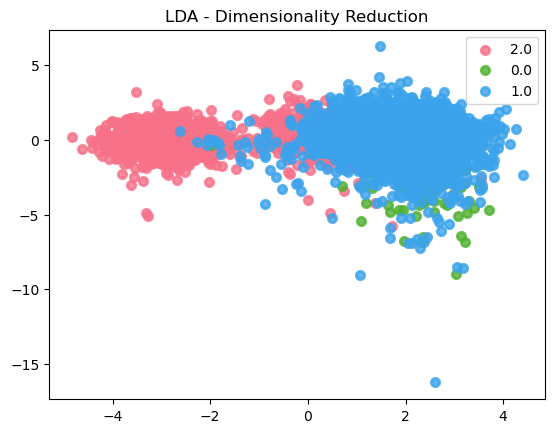

,0,1
0,2.823408,-1.308429
1,2.043702,0.284391
2,2.310854,1.431033
3,-2.978039,1.003845
4,2.731494,2.817966
...,...,...
10170,0.629455,2.048596
10171,-2.860612,-0.357239
10172,2.765504,0.904819
10173,-2.723103,-0.489651


In [14]:
plot_and_perform_dimensionality_reduction(X, y_1, target_names=df3[target_features[0]].unique(),
                              num_components=lda_optimal_num_components3, method='LDA')

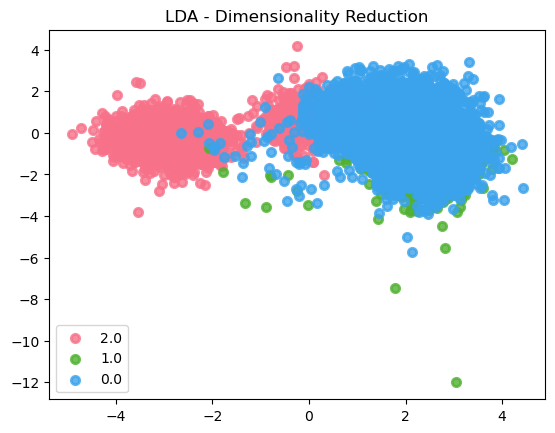

In [15]:
df_X_LDA=plot_and_perform_dimensionality_reduction(X, y_2, target_names=df3[target_features[1]].unique(),
                              num_components=lda_optimal_num_components4, method='LDA')

In [16]:
df_LDA = pd.concat([df_X_LDA, y], axis=1)
df_LDA.head()
save_files([df_LDA],'df_filling_missing_values_with_median_encoded_handle_noisy_handle_outlier_normalized_highly_correlated_perform_LDA.csv', base_path=base_path)